In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from alphastable import *

In [8]:
Image_width = 10
plt.rc('text', usetex = True) # latex ticks
plt.rc('text.latex')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ['Computer Modern'],
})

EXTRA_SMALL = 10
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=EXTRA_SMALL)         # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
sigma = 1
d = 2
N = 100
alpha = 1.8
beta = 1
gamma = np.cos((np.pi * alpha) / 4) ** (2/alpha)
delta = 0
G = np.random.normal(0, sigma, size=[N, d])
A = alphastable(N, 1, alpha/2, beta, gamma, delta, 1)
X = np.sqrt(A) * G

Estimate the characteristic function


In [3]:
T = np.arange(-3, 3 + 0.01, 0.01)
Re = np.ones((len(T), len(T)))
Im = np.ones((len(T), len(T)))
for i in range(len(T)):
    for j in range(len(T)):
        Re[i, j] = np.sum(np.cos(T[i] * X[:, 0] + T[j] * X[:, 1]))
        Im[i, j] = np.sum(np.sin(T[i] * X[:, 0] + T[j] * X[:, 1]))
Re_MC = Re / len(X)
Im_MC = Im /len(X)

In [4]:
# tmpT = []
# for i in range(len(T)):
#     for j in range(len(T)):
#         tmpT.append([T[i], T[j]])

# tmpT = np.array(tmpT)
# tmpX = np.repeat(X) #!sprawdzić ile razy
# Re = np.zeros((len(T)**2))
# Im = np.zeros((len(T)**2))

# for k in range(len(X)):
#     tmp = sum(tmpT*X)
#     Re += np.cos(sum)
#     Im += np.sin(T[i] * X[k, 0] + T[j] * X[k, 1])
#     #! domyśleć i dokończyć

In [5]:

def characterist_fun_task2(theta, alpha, sigma):
    '''
    theta powinna byc listą list punktów,
    dla których liczona jest funkcja charakterystyczna,
    lub odpowiednią macierza.
    '''
    def myAbs(theta):
        if theta.shape == 1:
            return abs(theta)
        return np.sqrt(np.sum(theta ** 2, 1))

    theta = np.array(theta)
    # beta = 1
    # gamma = np.cos(np.pi * alpha / 4) ** (2 / alpha)
    # delta = 0
    return np.exp(-(2 ** (-alpha/2)) * (sigma ** alpha) * (myAbs(theta) ** alpha))

def characterist_fun_meshgrid(theta, alpha, sigma):
    '''
    theta powinna byc listą par punktow w kolejnych wymiarach,
    lub odpowiednią macierza.
    '''
    theta = np.array(theta)
    tet = []
    for i in range(len(theta[0])):
        for j in range(len(theta[1])):
            tet.append([theta[0][i], theta[1][j]])
    tet = characterist_fun_task2(tet, alpha, sigma)
    return tet.reshape(len(theta[0]), len(theta[1]))

    

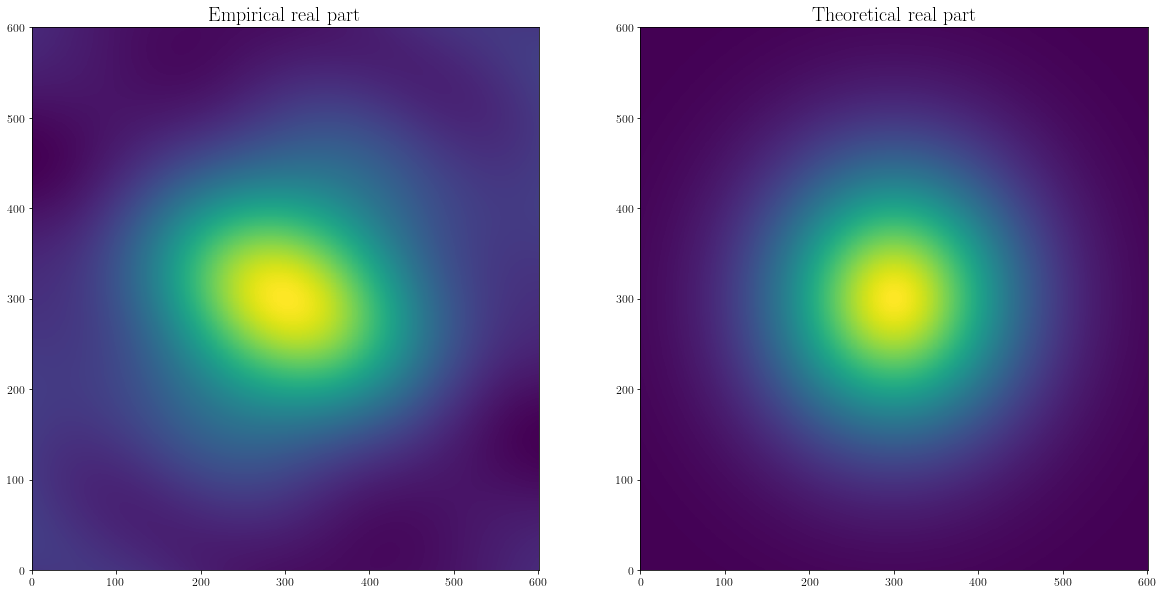

In [14]:
fig, axs = plt.subplots(ncols = 2, figsize = (2 * Image_width, Image_width))

ax = axs[0]
ax.pcolormesh(Re_MC)
ax.set_title("Empirical real part")

ax = axs[1]
ax.pcolormesh(characterist_fun_meshgrid([T,T], alpha, sigma))
ax.set_title("Theoretical real part");

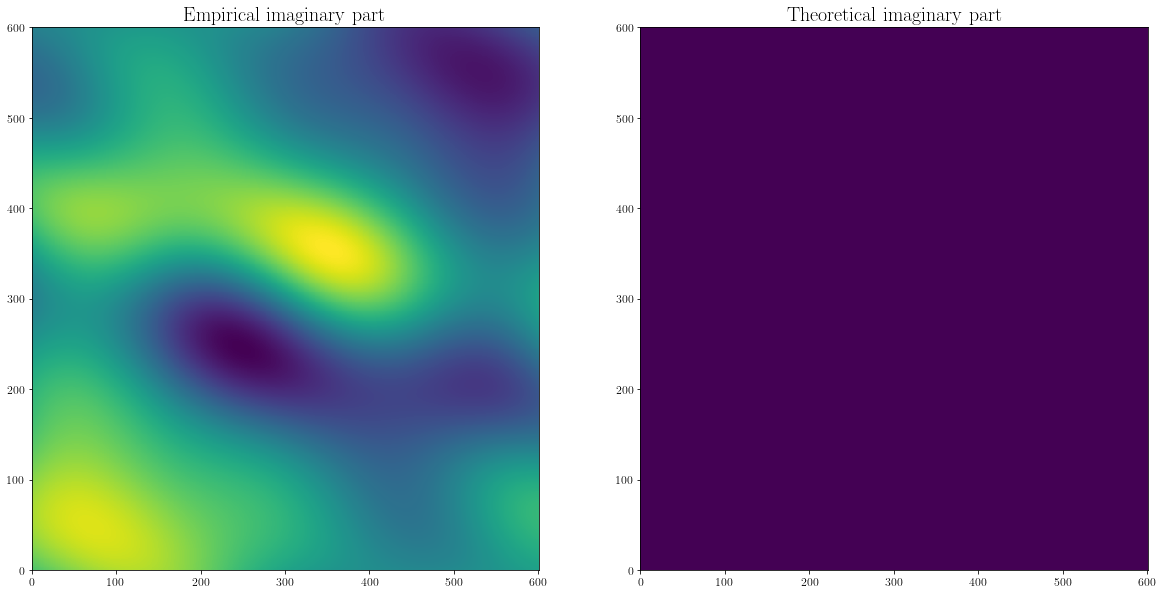

In [16]:
fig, axs = plt.subplots(ncols = 2, figsize = (2 * Image_width, Image_width))

ax = axs[0]
ax.pcolormesh(Im_MC)
ax.set_title("Empirical imaginary part")

ax = axs[1]
ax.pcolormesh(np.imag(characterist_fun_meshgrid([T,T], alpha, sigma)))
ax.set_title("Theoretical imaginary part");